## Analysis of Accelerometer data and Classification of seizure and non seizure data points

This notebook presents the analysis of the accelerometer data collected using IMU6886 sensor of M5 stack and shows how it can be classified using machine learing algorithms like SVM and Decision Trees.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv("seizuredata.csv", header = None)
df_x = df.drop(df.columns[-1], axis=1) # dropping the last column which is labels
df_x

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.25,-1.06,0.38,-0.25,-0.92,0.31,-0.16,-0.92,0.47,-0.25,...,0.18,-0.22,-0.69,0.47,-0.20,-0.65,0.48,-0.23,-0.82,0.47
1,-0.21,-0.88,0.25,-0.18,-0.81,0.43,-0.20,-0.87,0.35,-0.15,...,-0.16,-0.27,-0.78,-0.09,-0.29,-0.94,0.11,-0.28,-0.86,0.09
2,-0.33,-1.08,0.08,-0.23,-0.90,0.21,-0.18,-1.08,0.20,-0.21,...,0.33,-0.19,-0.91,0.19,-0.19,-0.35,0.85,-0.24,-0.96,0.61
3,-0.30,-0.68,0.28,-0.28,-0.29,0.73,-0.24,-0.68,0.52,-0.24,...,0.33,-0.30,-0.85,0.52,-0.33,-0.46,0.71,-0.30,-0.48,0.62
4,-0.27,-0.94,0.27,-0.35,-0.77,0.56,-0.30,-0.23,0.74,-0.17,...,0.83,-0.28,-0.87,0.50,-0.34,-0.61,0.77,-0.35,-0.45,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.06,0.09,1.09,0.06,0.08,1.09,0.05,0.09,1.09,0.07,...,1.09,0.06,0.09,1.09,0.06,0.09,1.09,0.06,0.09,1.08
508,0.06,0.09,1.09,0.05,0.09,1.08,0.06,0.08,1.08,0.06,...,1.09,0.07,0.06,1.09,0.07,0.06,1.09,0.07,0.07,1.09
509,0.07,0.07,1.09,0.07,0.07,1.09,0.07,0.07,1.09,0.07,...,1.05,-0.04,0.12,1.11,0.02,0.10,1.09,-0.02,0.01,1.09
510,-0.06,0.14,1.05,-0.05,0.28,1.06,-0.03,0.28,1.06,0.02,...,1.07,0.03,0.19,1.07,0.04,0.18,1.08,0.04,0.18,1.08


In [23]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.00000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,-0.047324,0.034551,0.698906,-0.052363,0.023809,0.690723,-0.042656,0.064629,0.672598,-0.053887,...,-0.043164,0.04043,0.693730,-0.047422,0.020547,0.692051,-0.050977,0.036582,0.701133,0.462891
std,0.431005,0.383773,0.485515,0.422589,0.395724,0.509236,0.429725,0.370424,0.522574,0.418428,...,0.423762,0.38300,0.503738,0.425883,0.360630,0.515688,0.429596,0.363531,0.495415,0.499109
min,-1.100000,-1.480000,-0.950000,-1.000000,-1.400000,-1.090000,-1.050000,-1.160000,-1.070000,-0.990000,...,-0.950000,-1.44000,-1.140000,-1.010000,-1.440000,-1.090000,-1.130000,-1.340000,-1.300000,0.000000
25%,-0.172500,-0.100000,0.370000,-0.180000,-0.110000,0.370000,-0.170000,-0.090000,0.350000,-0.180000,...,-0.172500,-0.11000,0.340000,-0.170000,-0.110000,0.380000,-0.180000,-0.090000,0.400000,0.000000
50%,-0.070000,0.050000,1.035000,-0.065000,0.050000,1.030000,-0.050000,0.060000,1.025000,-0.060000,...,-0.060000,0.05000,1.040000,-0.050000,0.030000,1.040000,-0.060000,0.060000,1.035000,0.000000
75%,0.070000,0.190000,1.080000,0.062500,0.180000,1.080000,0.080000,0.192500,1.080000,0.070000,...,0.080000,0.19000,1.080000,0.070000,0.172500,1.080000,0.070000,0.190000,1.080000,1.000000
max,1.900000,0.980000,1.120000,2.010000,1.040000,1.170000,1.450000,1.070000,1.180000,1.350000,...,1.410000,1.20000,1.180000,1.210000,1.060000,1.130000,1.280000,1.140000,1.160000,1.000000


<BarContainer object of 2 artists>

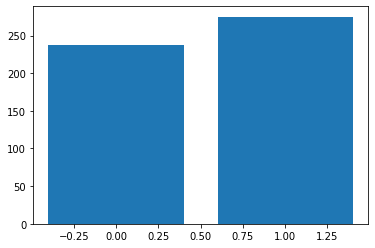

In [35]:
plt.bar( df[df.columns[-1]].unique(),df[df.columns[-1]].value_counts())

The data is almost evenly distributed between different categories

In [ ]:
# performing principal component analysis and representing 48 features into two features 
from sklearn.decomposition import PCA
acc_data_pca = PCA(n_components = 2)
principal_components_acc = acc_data_pca.fit_transform(df_x)

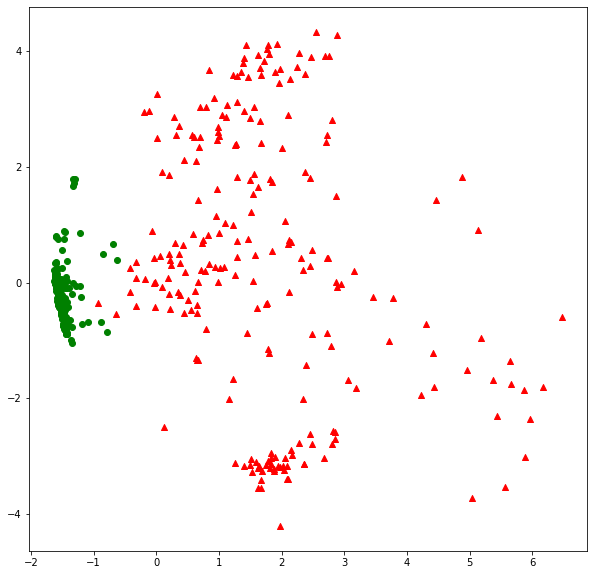

In [ ]:
reduced_df = pd.DataFrame(data = principal_components_acc, columns = ['p1', 'p2'])
new_df = pd.concat([reduced_df, df[df.columns[-1]]], axis=1)

fig = plt.figure(figsize=(10, 10))
x1 = new_df[new_df[new_df.columns[-1]]==0]["p1"]
y1 = new_df[new_df[new_df.columns[-1]]==0]["p2"]
plt.scatter(x1,y1, c='g', marker='o')

x1 = new_df[new_df[new_df.columns[-1]]==1]["p1"]
y1 = new_df[new_df[new_df.columns[-1]]==1]["p2"]
plt.scatter(x1,y1, c='r', marker='^')

plt.show()

In [ ]:
#trying PCA with 3 features
acc_data_pca_3 = PCA(n_components = 3)
principal_components_acc = acc_data_pca_3.fit_transform(df_x)

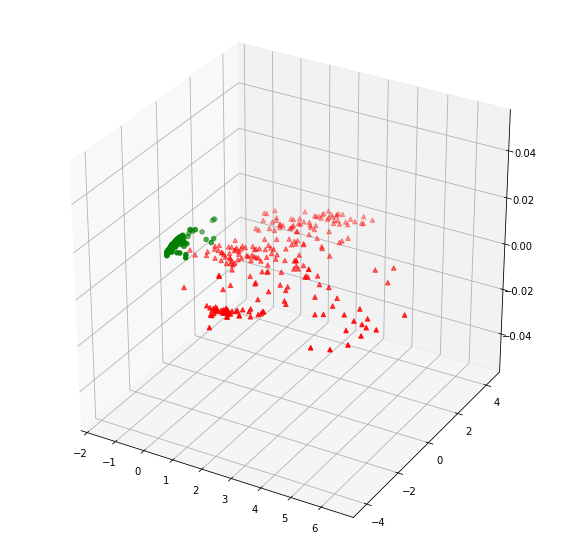

In [ ]:
reduced_df_3 = pd.DataFrame(data = principal_components_acc, columns = ['p1', 'p2', 'p3'])
new_df_3 = pd.concat([reduced_df_3, df[df.columns[-1]]], axis=1)



fig = plt.figure(figsize=(10, 10))
fig = fig.add_subplot(projection='3d')
x1 = new_df_3[new_df_3[new_df_3.columns[-1]]==0]["p1"]
y1 = new_df_3[new_df_3[new_df_3.columns[-1]]==0]["p2"]
z1 = new_df_3[new_df_3[new_df_3.columns[-1]]==0]["p3"]
fig.scatter(x1,y1, c='g', marker='o')

x1 = new_df_3[new_df_3[new_df_3.columns[-1]]==1]["p1"]
y1 = new_df_3[new_df_3[new_df_3.columns[-1]]==1]["p2"]
z1 = new_df_3[new_df_3[new_df_3.columns[-1]]==1]["p3"]
fig.scatter(x1,y1, c='r', marker='^')

plt.show()

#### Looking at the above graphs, we can see the data points can be separated using linear decision boundary, so lets use Support Vector machines to classify the data. We are using the whole 48 features to train the SVM model. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

#splitting the data for train and validation
x_train, x_test, y_train, y_test = train_test_split(df_x, df[df.columns[-1]], test_size = 0.2, random_state = 20)

model = svm.SVC(kernel = 'linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print("Accuracy of the trained SVM model is " + str(accuracy_score(y_pred, y_test)*100)+"%.")

Accuracy of the trained SVM mdoel is 100.0%.


Testing with another algoritm 

In [22]:
# using random forrest classfier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy of the trained Random Forest model is " + str(accuracy_score(y_pred, y_test)*100)+"%.")

Accuracy of the trained Random Forest model is 99.02912621359224%.
